# Combine Low Metallicity fig and Bad Subtraction fig

In [40]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from glob import glob

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 19})

plt.rcParams["figure.figsize"] = (12,7.5)

directory = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/6sResults/'
persistent_residuals = pd.read_csv(directory + 'r_persistent_events.csv')


# plt.fig(dpi=300)

plt.savefig(figdir+'Prot_noyes_david_4teff.png', 
            format='png', dpi=300, facecolor="w")

In [41]:
star = 'HIP68030'
observed_wl = 5205.464030
rest_wl = 5405.936025

apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

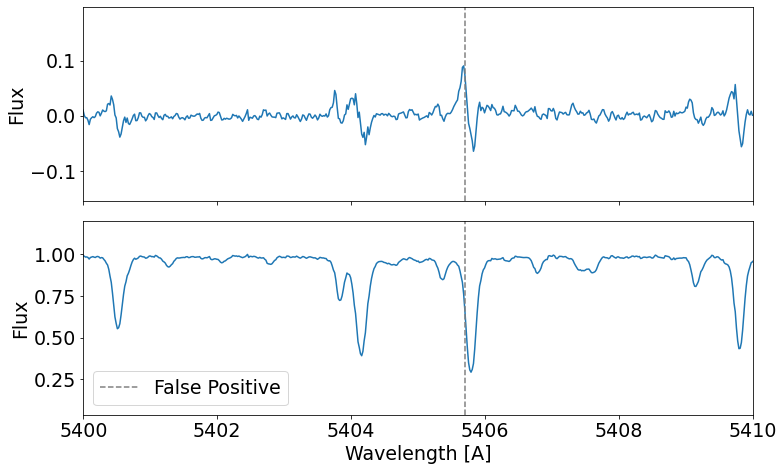

In [42]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    if 'HIP68030_8_NDRR.fits' in file:
        # plt.axvline(rest_wl - .25, ls='--', color='gray', label='False Positive')
        resid_wl = wl
        resid_fl = flux

for file in rest_files:
    if 'HIP68030_8_NDRS.fits' in file:
        if 'NDRR' in file:
            print('skipped')
            continue
        subfile = fits.open(file)
        flux = subfile[0].data
        wl = subfile[1].data

        header = subfile[0].header
        star = header['TOBJECT']
        date = header['DATE-OBS']

        # plt.axvline(rest_wl - .12, ls='--', color='gray', label='False Positive')
    
        

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=.1)


met_resid_wl = resid_wl[:]
met_resid_fl = resid_fl[:]
met_rest_wl = rest_wl - 0.24

met_wl = wl 
met_fl = flux

axs[0].plot(resid_wl, resid_fl)
axs[0].axvline(rest_wl - 0.24, ls='--', color='gray', label='False Positive')
# axs[0].set_ylim(-0.2, 0.2)
# axs[0].set_yticks(np.arange(-0.2, 0.2, 0.15))
axs[0].set_ylabel('Flux')

axs[1].plot(wl, flux)
axs[1].axvline(rest_wl - 0.24, ls='--', color='gray', label='False Positive')
# axs[1].set_ylim(0, 1.1)
# axs[1].set_yticks(np.arange(0, 1.2, 0.4))
axs[1].set_ylabel('Flux')

plt.xlim(5400, 5410)
plt.xlabel('Wavelength [A]')
plt.legend()

# # Plot 1:
# fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(left=0.2, wspace=0.6)
# make_plot(axs)

# just align the last column of axes:
fig.align_ylabels(axs[0])
plt.show()

plt.show()

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP14286_1_NDRS.fits
HIP14286
2018-11-05T07:56:10.17


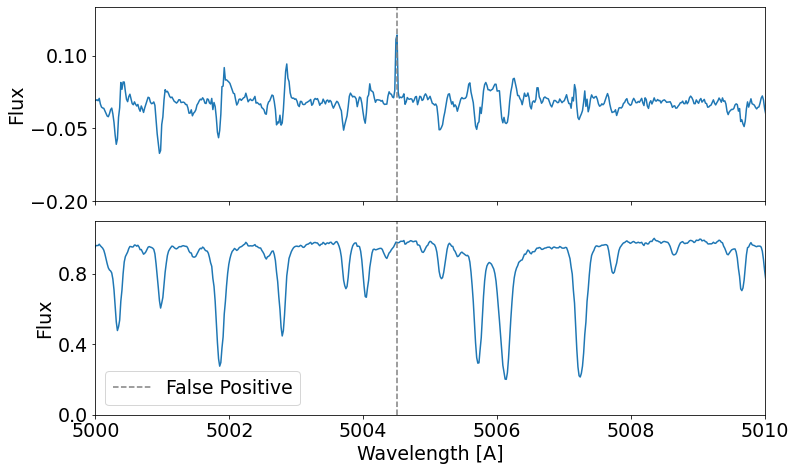

In [43]:
star = 'HIP14286'
observed_wl = 5004.385866
rest_wl = 5004.504441

apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

for file in resid_files:
    if 'HIP14286_1_NDRR.fits' in file:
        subfile = fits.open(file)
        flux = subfile[1].data
        wl = subfile[2].data

        resid_wl = wl
        resid_fl = flux

for file in rest_files:
    if 'HIP14286_1_NDRS.fits' in file:
        if 'NDRR' in file:
            print('skipped')
            continue
        subfile = fits.open(file)
        flux = subfile[0].data
        wl = subfile[1].data

        header = subfile[0].header
        star = header['TOBJECT']
        date = header['DATE-OBS']
        print(file)
        print(star)
        print(date)
        
# plt.axvline(rest_wl, ls='--', color='gray', label='False Positive')
# plt.plot(wl, flux)
# plt.xlim(rest_wl - 6, rest_wl + 6)
# # plt.title('SM Rest Frame Spectrum')
# plt.xlabel('Wavelength [A]')
# plt.ylabel('Flux')
# plt.legend()
# plt.show()
        

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=.1)


sub_resid_wl = resid_wl[:]
sub_resid_fl = resid_fl[:]
sub_rest_wl = rest_wl

sub_wl = wl 
sub_fl = flux

axs[0].plot(resid_wl, resid_fl)
axs[0].axvline(rest_wl, ls='--', color='gray', label='False Positive')
axs[0].set_ylim(-0.2, 0.2)
axs[0].set_yticks(np.arange(-0.2, 0.2, 0.15))
axs[0].set_ylabel('Flux')

axs[1].plot(wl, flux)
axs[1].axvline(rest_wl, ls='--', color='gray', label='False Positive')
axs[1].set_ylim(0, 1.1)
axs[1].set_yticks(np.arange(0, 1.2, 0.4))
axs[1].set_ylabel('Flux')

plt.xlim(5000, 5010)
plt.xlabel('Wavelength [A]')
plt.legend()

# # Plot 1:
# fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(left=0.2, wspace=0.6)
# make_plot(axs)

# just align the last column of axes:
fig.align_ylabels(axs[0])
plt.show()

plt.show()

In [ ]:
colors:
    , 'tab:orange'
    , 'tab:green'
    , 'tab:red'

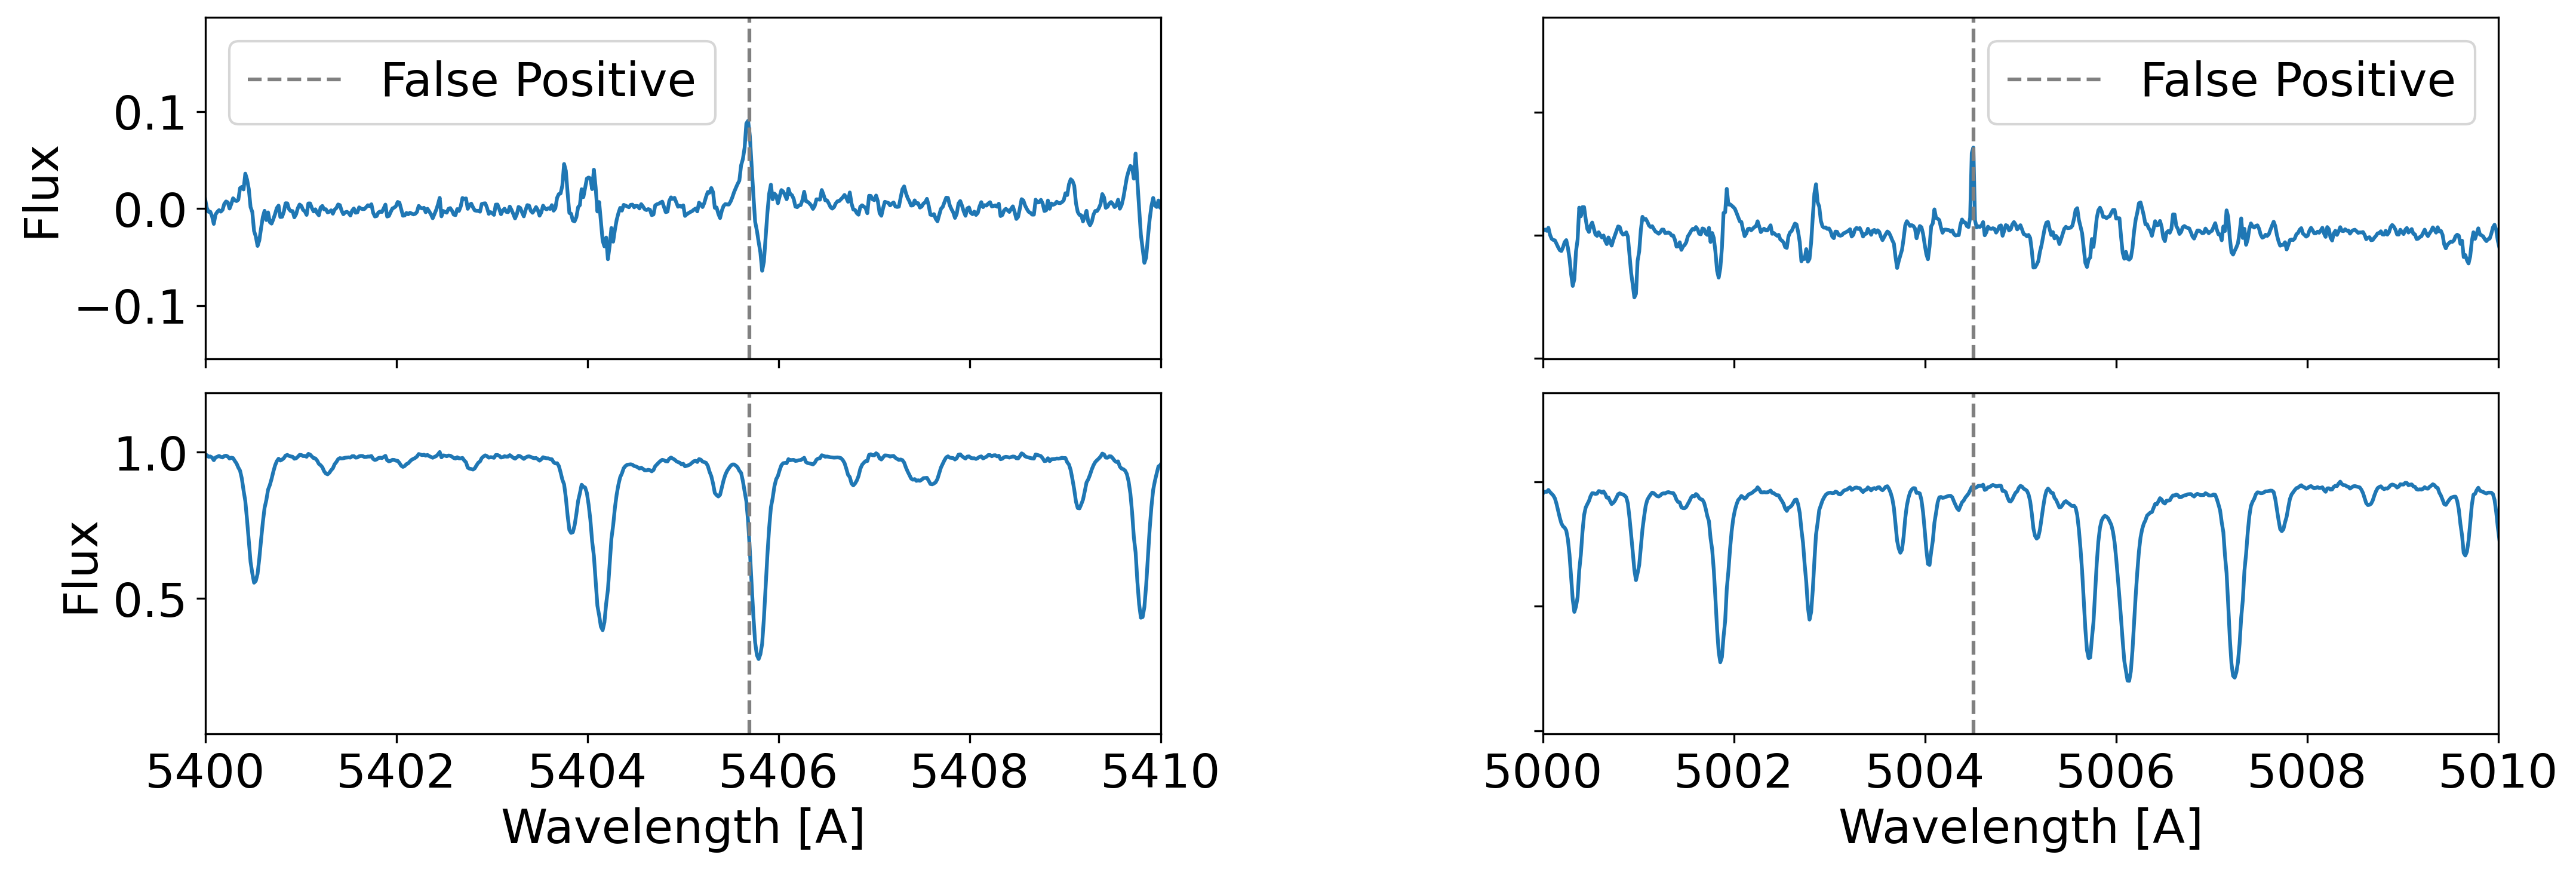

In [56]:
plt.rcParams["figure.figsize"] = (16,5)
plt.rcParams["figure.dpi"] = 300

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(met_resid_wl, met_resid_fl)
ax1.set_xlim(5400, 5410)
ax1.axvline(x = met_rest_wl, ls='--', color='gray', label='False Positive')
ax1.set_ylabel('Flux')
ax1.legend()

ax2.plot(sub_resid_wl, sub_resid_fl)
ax2.set_xlim(5000, 5010)
ax2.axvline(x = sub_rest_wl, ls='--', color='gray', label='False Positive')
ax2.legend()

ax3.plot(met_wl, met_fl)
ax3.set_xlim(5400, 5410)
ax3.axvline(x = met_rest_wl, ls='--', color='gray')
ax3.set_xlabel('Wavelength [A]')
ax3.set_ylabel('Flux')

ax4.plot(sub_wl, sub_fl)
ax4.set_xlim(5000, 5010)
ax4.axvline(x = sub_rest_wl, ls='--', color='gray')
ax4.set_xlabel('Wavelength [A]')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.1)



for ax in fig.get_axes():
    ax.label_outer()
    

In [52]:
plt.savefig('test.png', 
            format='png', dpi=300)

<Figure size 1152x360 with 0 Axes>